In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as tdata
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
DATA_PATH = "./pokemon-images/pokemon-images"

BATCH_SIZE = 10

TRANSFORMS = transforms.Compose([
                                 transforms.Resize(28),
                                 transforms.CenterCrop(28),
                                 transforms.ToTensor()
])

data = torchvision.datasets.ImageFolder(root=DATA_PATH, transform=TRANSFORMS)
firstDim = data[0][0].size(0)
print(data[0][0].view(firstDim, -1).shape)

torch.Size([3, 784])


In [41]:
class VAE(nn.Module):
  def __init__(self):
    super(VAE, self).__init__()

    self.fc1 = nn.Linear(2352, 400)
    self.relu = nn.ReLU()
    self.fc21 = nn.Linear(400, 20)
    self.fc22 = nn.Linear(400, 20) 

    self.fc3 = nn.Linear(20, 400)
    self.fc4 = nn.Linear(400, 2352)
    self.sigmoid = nn.Sigmoid()
  
  def reparameterize(self, mu: Variable, logvar):
        if self.training: 
            std = logvar.mul(0.5).exp_()  # type: Variable
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
  
  def encode(self, x):
    h1 = self.relu(self.fc1(x))  
    return self.fc21(h1), self.fc22(h1)
 
  def decode(self, z):
    h3 = self.relu(self.fc3(z))
    return self.sigmoid(self.fc4(h3))

  def forward(self, x):
    mu, logvar = self.encode(x.view(-1, 3*28*28))
    z = self.reparameterize(mu, logvar)
    return self.decode(z), mu, logvar

In [42]:
model = VAE()
state = torch.load('modelPickle')
model.load_state_dict(state)
model.eval()

VAE(
  (fc1): Linear(in_features=2352, out_features=400, bias=True)
  (relu): ReLU()
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=2352, bias=True)
  (sigmoid): Sigmoid()
)

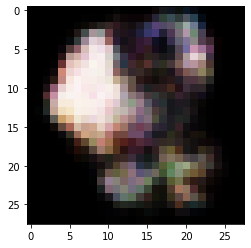

In [61]:
randomS = torch.from_numpy(np.random.normal(0,2,size=(1,20))).float()
img = model.decode(randomS).view(3, 28, 28)
plt.imshow(img.T.detach().numpy())